### EDA and Feature Engineering

In this lab, you will perform Exploratory Data Analysis and Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read the dataset and then read to a df

url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
df=pd.read_csv(url)

In [3]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

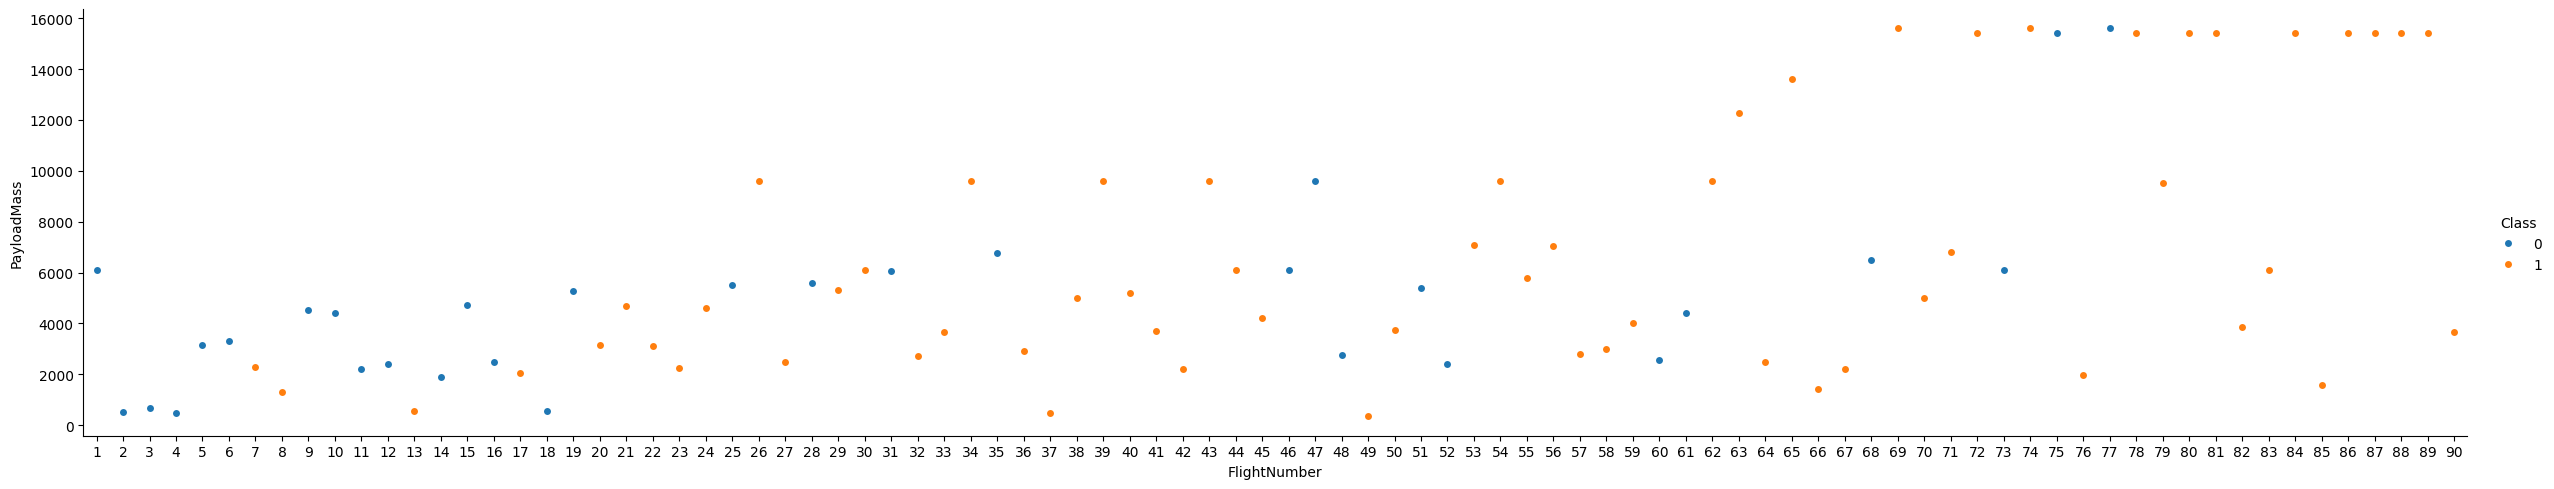

In [4]:
sns.catplot(y='PayloadMass',x='FlightNumber',hue='Class',data=df,aspect=5)
plt.xlabel('FlightNumber')
plt.ylabel('PayloadMass')
plt.show()

Task1

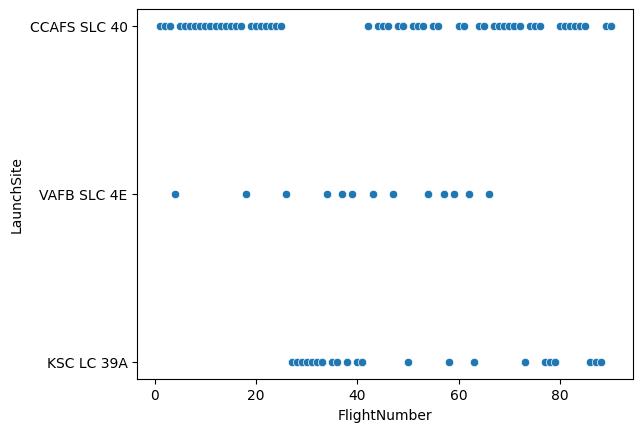

In [6]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.scatterplot(x='FlightNumber',y='LaunchSite',data=df)
plt.show()

Task2

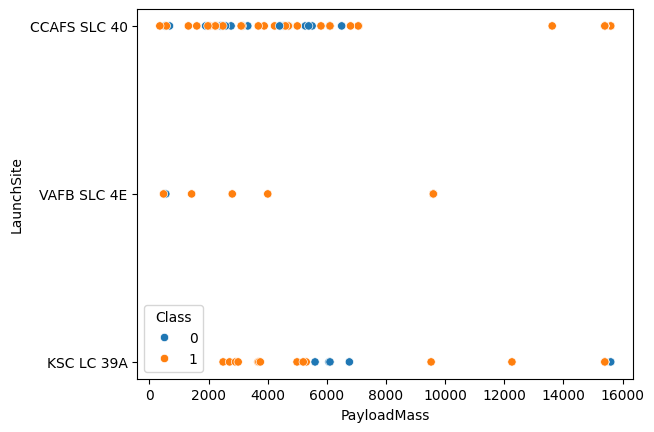

In [8]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.scatterplot(x='PayloadMass',y='LaunchSite',data=df,hue='Class')
plt.show()

Task3

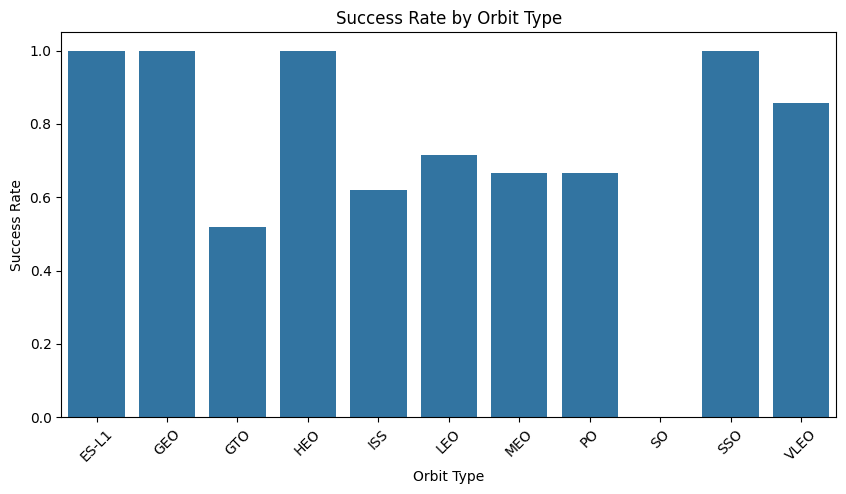

In [9]:
# HINT use groupby method on Orbit column and get the mean of Class column

# Assuming df contains 'Orbit' and 'Class' columns
success_rate = df.groupby('Orbit', as_index=False)['Class'].mean()  # Calculate success rate

# Bar Chart
plt.figure(figsize=(10,5))
sns.barplot(x='Orbit', y='Class', data=success_rate)

# Labels & Title
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.title('Success Rate by Orbit Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


Task4

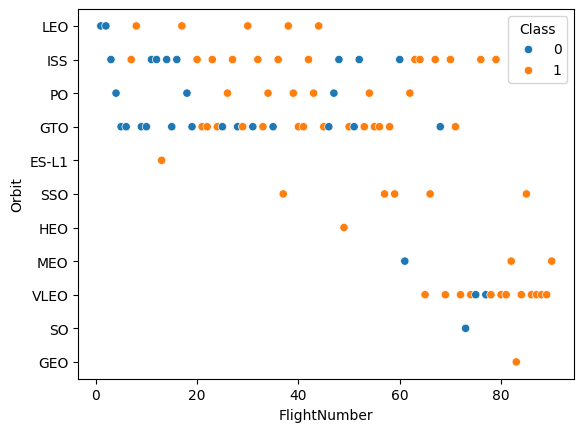

In [12]:
## Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

sns.scatterplot(x='FlightNumber',y='Orbit',data=df,hue='Class')
plt.show()

Task5

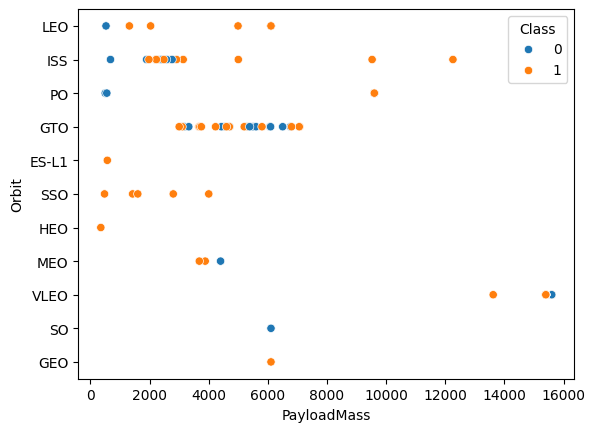

In [13]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(x='PayloadMass',y='Orbit',hue='Class',data=df)
plt.show()

Task6

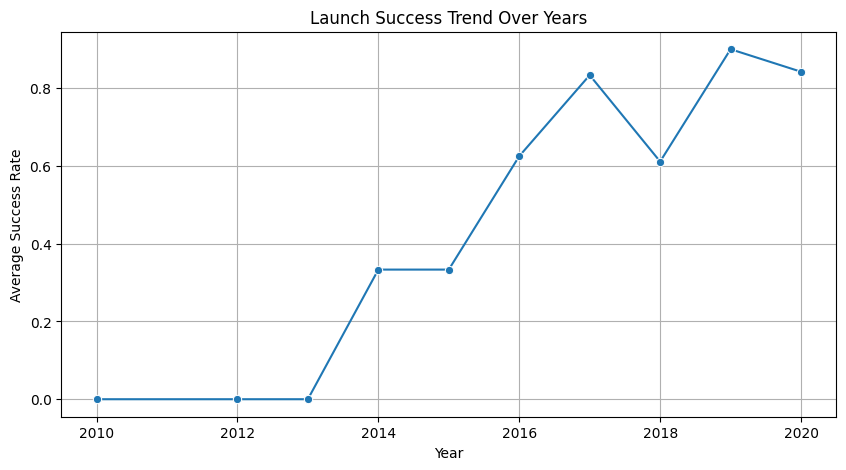

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df contains 'Date' (YYYY-MM-DD format) and 'Class' (0 or 1 for success/failure)
df['Year'] = df['Date'].str.split("-").str[0]  # Extract Year from Date

# Convert Year column to integer
df['Year'] = df['Year'].astype(int)

# Group by Year and compute the average success rate
success_trend = df.groupby('Year', as_index=False)['Class'].mean()

# Line Chart
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Class', data=success_trend, marker='o', linestyle='-')

# Labels & Title
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.title('Launch Success Trend Over Years')

# Show Grid
plt.grid(True)

# Show the plot
plt.show()


Task7

In [21]:
import pandas as pd

# Select categorical columns for One-Hot Encoding
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

features=df.copy()
# Apply One-Hot Encoding
features_one_hot = pd.get_dummies(features, columns=categorical_cols)

# Display the first few rows
features_one_hot.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010,Falcon 9,6104.959412,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
1,2,2012,Falcon 9,525.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2013,Falcon 9,677.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2013,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
4,5,2013,Falcon 9,3170.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False


Task8

In [23]:
# Check the data types of all columns
print(features_one_hot.dtypes)

# Identify non-numeric columns
non_numeric_cols = features_one_hot.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Drop non-numeric columns OR apply encoding
features_one_hot = features_one_hot.drop(columns=non_numeric_cols)  # Drop string columns if not needed
# OR (if they need to be included)
# features_one_hot = pd.get_dummies(features_one_hot, columns=non_numeric_cols)  # Encode them

# Convert to float64
features_one_hot = features_one_hot.astype('float64')

# Verify conversion
print(features_one_hot.dtypes)


FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Outcome            object
                   ...   
Serial_B1056         bool
Serial_B1058         bool
Serial_B1059         bool
Serial_B1060         bool
Serial_B1062         bool
Length: 87, dtype: object
Non-numeric columns: Index(['Date', 'BoosterVersion', 'Outcome'], dtype='object')
FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 84, dtype: object


In [24]:
features_one_hot.to_csv('dataset_part_3.csv',index=False)

In [25]:
import pandas as pd

# Sample dataframe with initial columns
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Apply One-Hot Encoding
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Get the number of columns after encoding
total_columns = features_one_hot.shape[1]

print("Total number of columns after One-Hot Encoding:", total_columns)


Total number of columns after One-Hot Encoding: 80
